In [2]:
import pandas as pd
import seaborn as sns
import itertools
import warnings
warnings.filterwarnings("ignore")
from wordcloud import WordCloud,STOPWORDS
import io
import base64
from matplotlib import rc,animation
from mpl_toolkits.mplot3d import Axes3D
import folium
import folium.plugins
import os

In [3]:
matches  = pd.read_csv(r"WorldCupMatches.csv")
players  = pd.read_csv(r"WorldCupPlayers.csv")
cups     = pd.read_csv(r"WorldCups.csv")
display("MATCHES - DATA")
display(matches.head(3))
display("PLAYERS - DATA")
display(players.head(3))
display("WORLD CUPS - DATA")
display(cups.head(3))

'MATCHES - DATA'

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
0,1930.0,13 Jul 1930 - 15:00,Group 1,Pocitos,Montevideo,France,4.0,1.0,Mexico,,4444.0,3.0,0.0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201.0,1096.0,FRA,MEX
1,1930.0,13 Jul 1930 - 15:00,Group 4,Parque Central,Montevideo,USA,3.0,0.0,Belgium,,18346.0,2.0,0.0,MACIAS Jose (ARG),MATEUCCI Francisco (URU),WARNKEN Alberto (CHI),201.0,1090.0,USA,BEL
2,1930.0,14 Jul 1930 - 12:45,Group 2,Parque Central,Montevideo,Yugoslavia,2.0,1.0,Brazil,,24059.0,2.0,0.0,TEJADA Anibal (URU),VALLARINO Ricardo (URU),BALWAY Thomas (FRA),201.0,1093.0,YUG,BRA


'PLAYERS - DATA'

,RoundID,MatchID,Team Initials,Coach Name,Line-up,Shirt Number,Player Name,Position,Event
0,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Alex THEPOT,GK,NaN
1,201,1096,MEX,LUQUE Juan (MEX),S,0,Oscar BONFIGLIO,GK,NaN
2,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Marcel LANGILLER,NaN,G40'


'WORLD CUPS - DATA'

,Year,Country,Winner,Runners-Up,Third,Fourth,GoalsScored,QualifiedTeams,MatchesPlayed,Attendance
0,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,591
1,1934,Italy,Italy,Czechoslovakia,Germany,Austria,70,16,17,363
2,1938,France,Italy,Hungary,Brazil,Sweden,84,15,18,376


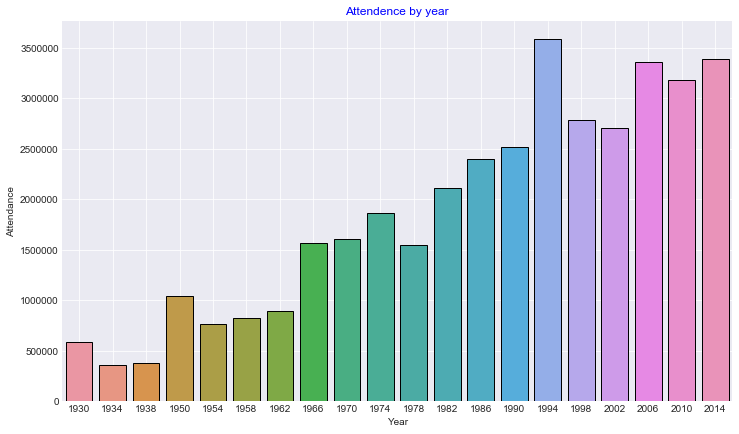

In [9]:
import matplotlib.pyplot as plt

matches.isnull().sum()
sns.set_style("darkgrid")

#removing duplicate rows for match id column 
matches = matches.drop_duplicates(subset="MatchID",keep="first")

#remob=ving null values
matches = matches[matches["Year"].notnull()]

att = matches.groupby("Year")["Attendance"].sum().reset_index()
att["Year"] = att["Year"].astype(int)
plt.figure(figsize=(12,7))
sns.barplot(att["Year"],att["Attendance"],linewidth=1,edgecolor="k"*len(att))
plt.grid(True)
plt.title("Attendence by year",color='b')
plt.show()

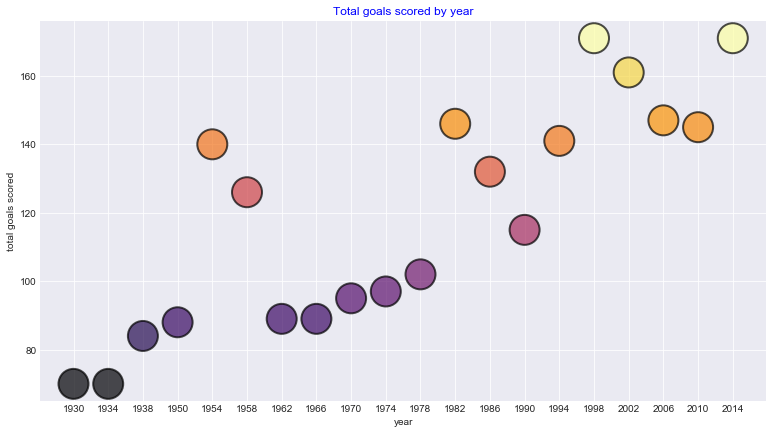

In [12]:
#Total goals scored by year
plt.figure(figsize=(13,7))
cups["Year1"] = cups["Year"].astype(str)
ax = plt.scatter("Year1","GoalsScored",data=cups,
            c=cups["GoalsScored"],cmap="inferno",
            s=900,alpha=.7,
            linewidth=2,edgecolor="k",)

#plt.colorbar()
plt.xticks(cups["Year1"].unique())
plt.title('Total goals scored by year',color='b')
plt.xlabel("year")
plt.ylabel("total goals scored")
plt.show()

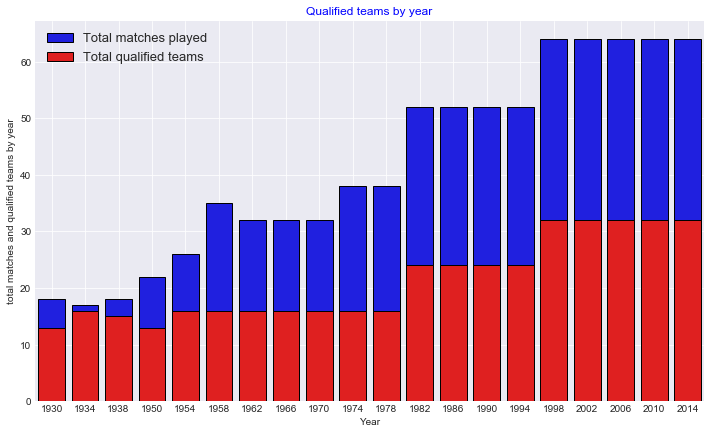

In [13]:
#Total matches played and qualifies teams
plt.figure(figsize=(12,7))
sns.barplot(cups["Year"],cups["MatchesPlayed"],linewidth=1,
            edgecolor="k"*len(cups),color="b",label="Total matches played")
sns.barplot(cups["Year"],cups["QualifiedTeams"],linewidth=1,
            edgecolor="k"*len(cups),color="r",label="Total qualified teams")
plt.legend(loc="best",prop={"size":13})
plt.title("Qualified teams by year",color='b')
plt.grid(True)
plt.ylabel("total matches and qualified teams by year")
plt.show()

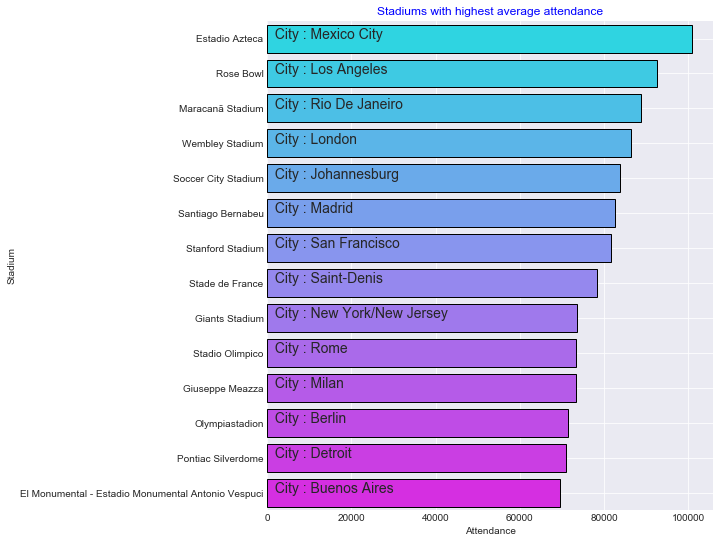

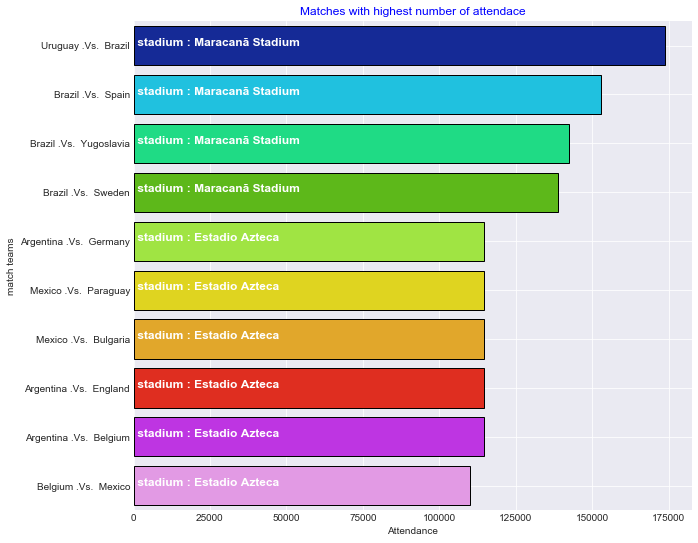

In [43]:
#Matches with highest number of attendancematches["Year"] = matches["Year"].astype(int)
matches["Datetime"] = matches["Datetime"].str.split("-").str[0]


matches["Stadium"] = matches["Stadium"].str.replace('Estadio do Maracana',"Maracanã Stadium")
matches["Stadium"] = matches["Stadium"].str.replace('Maracan� - Est�dio Jornalista M�rio Filho',"Maracanã Stadium")
std  = matches.groupby(["Stadium","City"])["Attendance"].mean().reset_index().sort_values(by = "Attendance",ascending =False)


plt.figure(figsize=(8,9))
ax = sns.barplot(y = std["Stadium"][:14],x = std["Attendance"][:14],palette="cool",
                 linewidth=1,edgecolor = "k"*14)
plt.grid(True)

for i,j in enumerate("  City : " + std["City"][:14]):
    ax.text(.7,i,j,fontsize=14)

plt.title("Stadiums with highest average attendance",color='b')
plt.show()
h_att = matches.sort_values(by="Attendance",ascending=False)[:10]
h_att = h_att[['Year', 'Datetime','Stadium', 'City', 'Home Team Name',
              'Home Team Goals', 'Away Team Goals', 'Away Team Name', 'Attendance', 'MatchID']]
h_att["Stadium"] = h_att["Stadium"].replace('Maracan� - Est�dio Jornalista M�rio Filho',"Maracanã Stadium")
h_att["Datetime"] = h_att["Datetime"].str.split("-").str[0]
h_att["mt"] = h_att["Home Team Name"] + " .Vs.  " + h_att["Away Team Name"]

plt.figure(figsize=(10,9))
ax = sns.barplot(y =h_att["mt"],x = h_att["Attendance"],palette="gist_ncar",
                 linewidth = 1,edgecolor="k"*len(h_att))
plt.ylabel("match teams")
plt.xlabel("Attendance")
plt.title("Matches with highest number of attendace",color='b')
plt.grid(True)
for i,j in enumerate(" stadium : "+h_att["Stadium"]):
    ax.text(.7,i,j,fontsize = 12,color="white",weight = "bold")
plt.show()

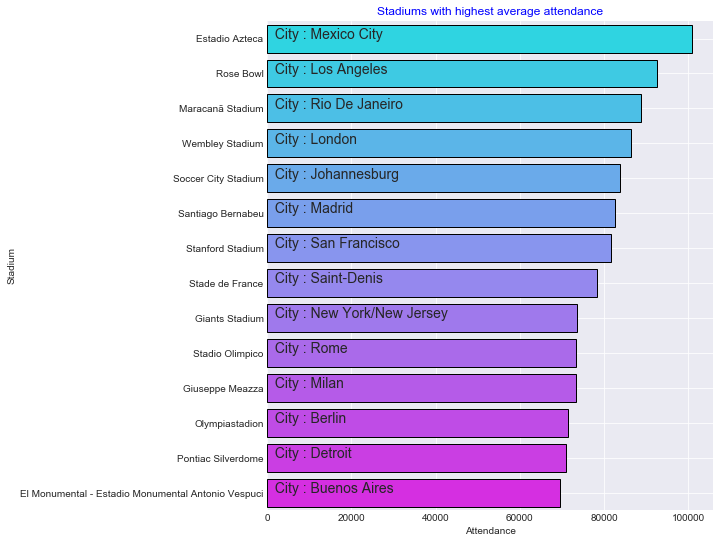

In [16]:
#Stadiums with highest average attendance
matches["Year"] = matches["Year"].astype(int)
matches["Datetime"] = matches["Datetime"].str.split("-").str[0]


matches["Stadium"] = matches["Stadium"].str.replace('Estadio do Maracana',"Maracanã Stadium")
matches["Stadium"] = matches["Stadium"].str.replace('Maracan� - Est�dio Jornalista M�rio Filho',"Maracanã Stadium")
std  = matches.groupby(["Stadium","City"])["Attendance"].mean().reset_index().sort_values(by = "Attendance",ascending =False)


plt.figure(figsize=(8,9))
ax = sns.barplot(y = std["Stadium"][:14],x = std["Attendance"][:14],palette="cool",
                 linewidth=1,edgecolor = "k"*14)
plt.grid(True)

for i,j in enumerate("  City : " + std["City"][:14]):
    ax.text(.7,i,j,fontsize=14)

plt.title("Stadiums with highest average attendance",color='b')
plt.show()

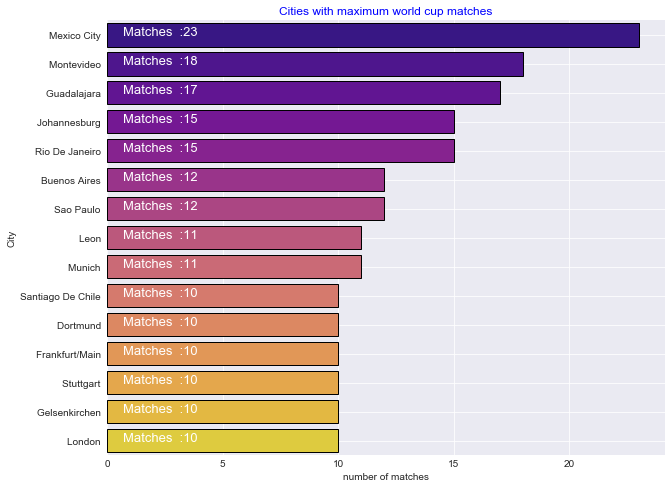

In [17]:
#Cities that hosted highest worldcup matches
mat_c = matches["City"].value_counts().reset_index()
plt.figure(figsize=(10,8))
ax = sns.barplot(y=mat_c["index"][:15],x = mat_c["City"][:15],palette="plasma",
                 linewidth=1,edgecolor="k"*15)
plt.xlabel("number of matches")
plt.ylabel("City")
plt.grid(True)
plt.title("Cities with maximum world cup matches",color='b')

for i,j in enumerate("Matches  :" + mat_c["City"][:15].astype(str)):
    ax.text(.7,i,j,fontsize = 13,color="w")
plt.show()

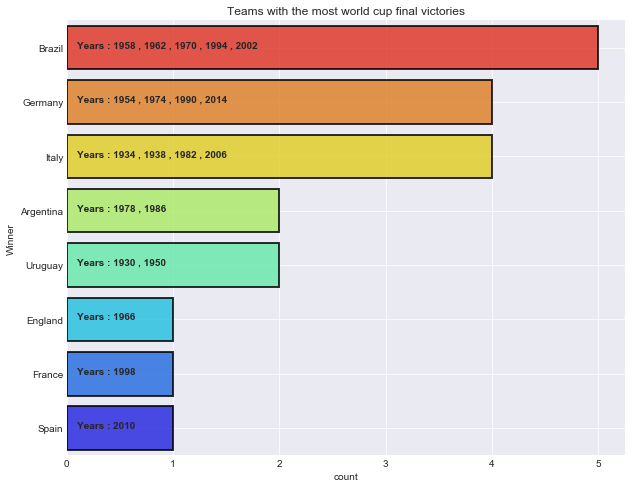

In [18]:
#Teams with the most world cup final victories
cups["Winner"]=cups["Winner"].replace("Germany FR","Germany")
cups["Runners-Up"]=cups["Runners-Up"].replace("Germany FR","Germany")
c1  = cups.groupby("Winner")["Year1"].apply(" , ".join).reset_index()
c2  = cups.groupby("Winner")['Year'].count().reset_index()
c12 = c1.merge(c2,left_on="Winner",right_on="Winner",how="left")
c12 = c12.sort_values(by = "Year",ascending =False)

plt.figure(figsize=(10,8))
ax = sns.barplot("Year","Winner",data=c12,
            palette="jet_r",
            alpha=.8,
            linewidth=2,
            edgecolor="k"*len(c12))
for i,j in enumerate("Years : " + c12["Year1"]):
    ax.text(.1,i,j,weight = "bold")

plt.title("Teams with the most world cup final victories")
plt.grid(True)
plt.xlabel("count")
plt.show()

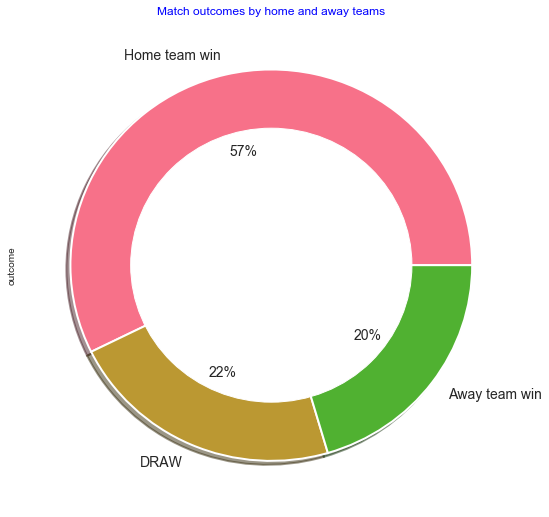

In [42]:
#Match outcomes by home and away teams
def label(matches):
    if matches["Home Team Goals"] > matches["Away Team Goals"]:
        return "Home team win"
    if matches["Away Team Goals"] > matches["Home Team Goals"]:
        return "Away team win"
    if matches["Home Team Goals"] == matches["Away Team Goals"]:
        return "DRAW"

matches["outcome"] = matches.apply(lambda matches:label(matches),axis=1)
plt.figure(figsize=(9,9))
matches["outcome"].value_counts().plot.pie(autopct="%1.0f%%",fontsize =14,
                                           colors = sns.color_palette("husl"),
                                           wedgeprops={"linewidth":2,"edgecolor":"white"},
                                           shadow=True)
circ = plt.Circle((0,0),.7,color="white")
plt.gca().add_artist(circ)
plt.title("Match outcomes by home and away teams",color='b')
plt.show()

In [20]:
penalties_df = pd.read_csv(r"penalties.csv", encoding='iso-8859-1')


def clean(data):
    data["F"] = data["F"].str.replace("","-")
    data["S"] = data["S"].str.replace("","-")
    data["Winner"] = data["Winner"].str.replace("West Germany","Germany")
    data["winner_penalties"] = data["S"].str.split("-").str[0]
    data["loser_penalties"]  = data["S"].str.split("-").str[1]
    data["Date"]   = pd.to_datetime(data["Date"],format="%d-%b-%y") 
    data["year"]   = pd.DatetimeIndex(data["Date"]).year
    data = data.rename(columns = {"S":"penalties_scored","F":"final_score"})
    return data


penalties_df = clean(penalties_df)

win = penalties_df["Winner"].value_counts().reset_index()
win.columns = ["team","count"]

los = penalties_df["Loser"].value_counts().reset_index()
los.columns = ["team","count"]

print ("Total matches with penalties :  " ,penalties_df.shape[0])

Total matches with penalties :   26


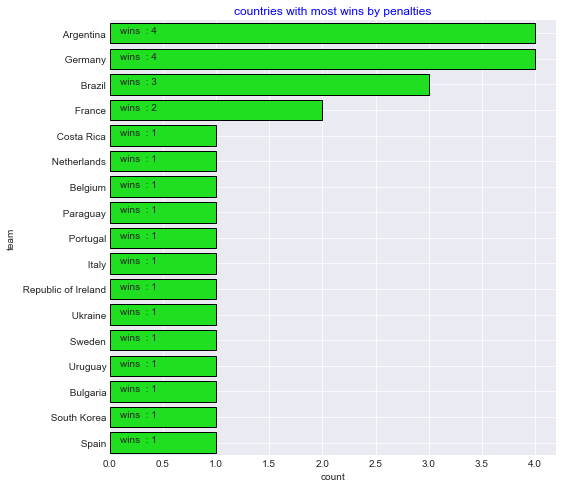

In [21]:
win
plt.figure(figsize=(8,8))

ax = sns.barplot("count","team",
            data=win,
            color= "lime",
            linewidth = 1,
            edgecolor = "k"*len(win))
plt.grid(True)
plt.title("countries with most wins by penalties",color='b')
for i,j in enumerate("wins  : " + win["count"].astype(str)):
    ax.text(.1,i,j)
plt.show()

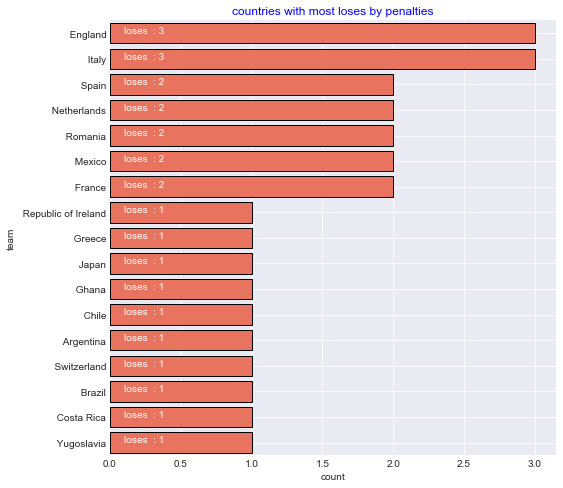

In [22]:
plt.figure(figsize=(8,8))

ax = sns.barplot("count","team",
            data=los,
            color= "tomato",
            linewidth = 1,
            edgecolor = "k"*len(los))
plt.grid(True)
plt.title("countries with most loses by penalties",color='b')
for i,j in enumerate("loses  : " + los["count"].astype(str)):
    ax.text(.1,i,j,color="white")
plt.show()


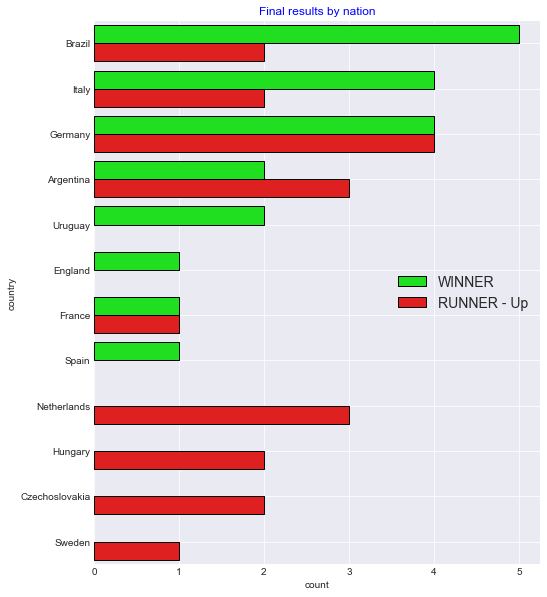

In [33]:
#Worldcup finals results by nation
cou = cups["Winner"].value_counts().reset_index()
cou_w = cou.copy()
cou_w.columns = ["country","count"]
cou_w["type"] = "WINNER"

cou_r = cups["Runners-Up"].value_counts().reset_index()
cou_r.columns = ["country","count"]
cou_r["type"] = "RUNNER - Up"

cou_t = pd.concat([cou_w,cou_r],axis=0)

plt.figure(figsize=(8,10))
sns.barplot("count","country",data=cou_t,
            hue="type",palette=["lime","r"],
            linewidth=1,edgecolor="k"*len(cou_t))
plt.grid(True)
plt.legend(loc="center right",prop={"size":14})
plt.title("Final results by nation",color='b')
plt.show()

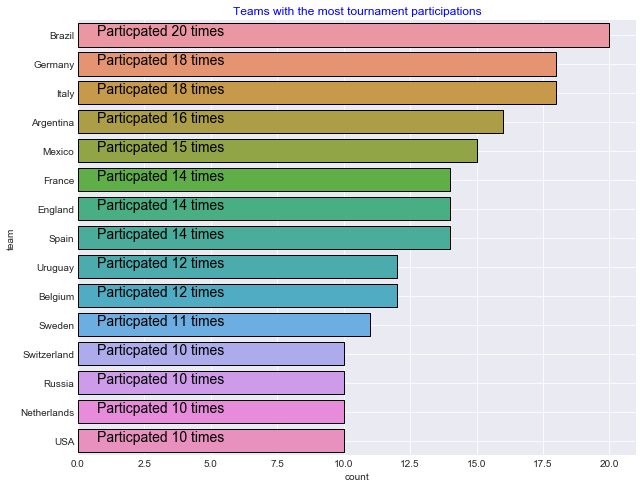

In [41]:
hy = matches[["Year","Home Team Name"]]
hy.columns = ["year","team"]
hy["type"] = "HOME TEAM"
ay = matches[["Year","Away Team Name"]]
ay.columns = ["year","team"]
ay["type"] = "AWAY TEAM"

home_away = pd.concat([hy,ay],axis=0)
yt = home_away.groupby(["year","team"]).count().reset_index()
yt = yt["team"].value_counts().reset_index()

plt.figure(figsize=(10,8))
ax = sns.barplot("team","index",data=yt[:15],
                 linewidth=1,edgecolor="k"*15)

for i,j in enumerate("Particpated " + yt["team"][:15].astype(str) + " times"):
    ax.text(.7,i,j,fontsize=14,color="k")
plt.grid(True)
    
plt.title("Teams with the most tournament participations",color='b')
plt.ylabel("team")
plt.xlabel("count")
plt.show()
